In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [44]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [45]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [46]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [47]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,Reviewed in India on 6 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,Reviewed in India on 11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
...,...,...,...,...
105,3.0 out of 5 stars\nValue for money,3.0,"Accuracy of all the readings sleep, walking, ...",Reviewed in India on 21 January 2024
106,4.0 out of 5 stars\nIt's real experience with ...,4.0,,Reviewed in India on 24 November 2023
107,4.0 out of 5 stars\nNice watch,4.0,It is very nice watch working properly price r...,Reviewed in India on 18 November 2023
108,4.0 out of 5 stars\nAwesome product,4.0,"Good product, value for money..",Reviewed in India on 22 November 2023


In [48]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [49]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
5,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
6,5.0 out of 5 stars\nFantastic product,5.0,Daily activities and excercise data are record...,25 March 2024
7,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
8,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
9,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


In [50]:
df.to_csv("BoatSmartWatch_Review.csv")

In [51]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
...,...,...,...,...
105,3.0 out of 5 stars\nValue for money,3.0,"Accuracy of all the readings sleep, walking, ...",21 January 2024
106,4.0 out of 5 stars\nIt's real experience with ...,4.0,NaN,24 November 2023
107,4.0 out of 5 stars\nNice watch,4.0,It is very nice watch working properly price r...,18 November 2023
108,4.0 out of 5 stars\nAwesome product,4.0,"Good product, value for money..",22 November 2023


In [52]:
reviews.Rating.describe()

count    110.000000
mean       4.181818
std        0.652192
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [53]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       107 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [54]:
reviews.isna().sum()

Title          0
Rating         0
Review         3
Review_Date    0
dtype: int64

In [55]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022


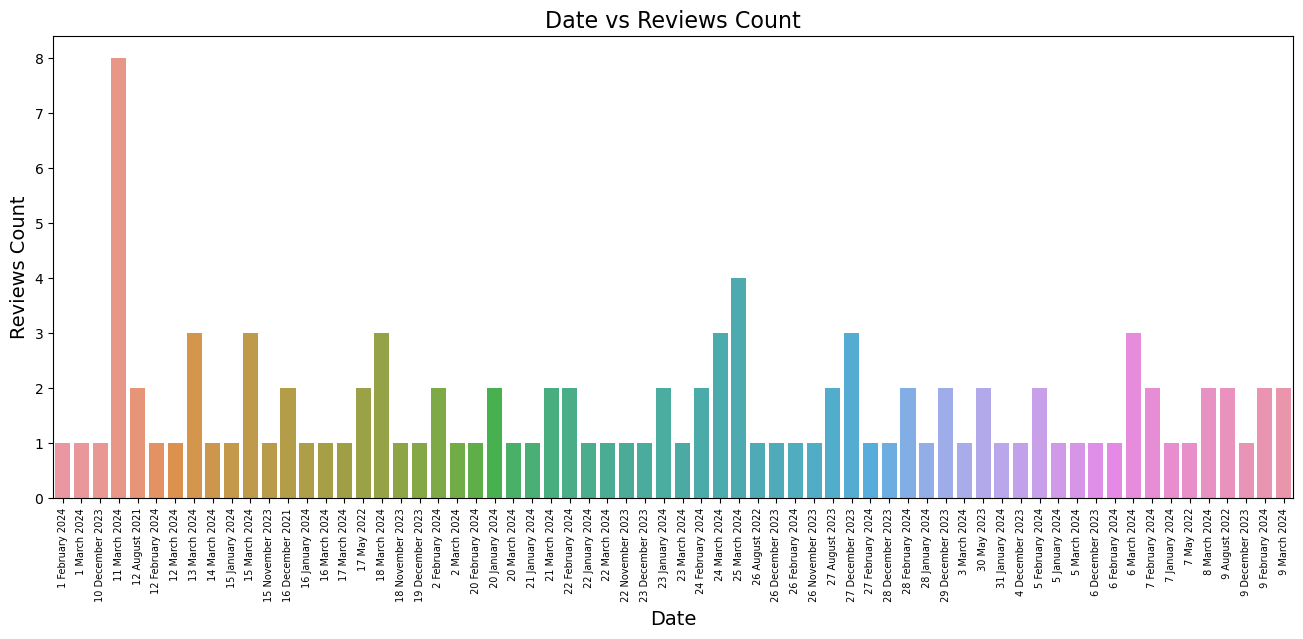

In [56]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

### Percentage of Ratings

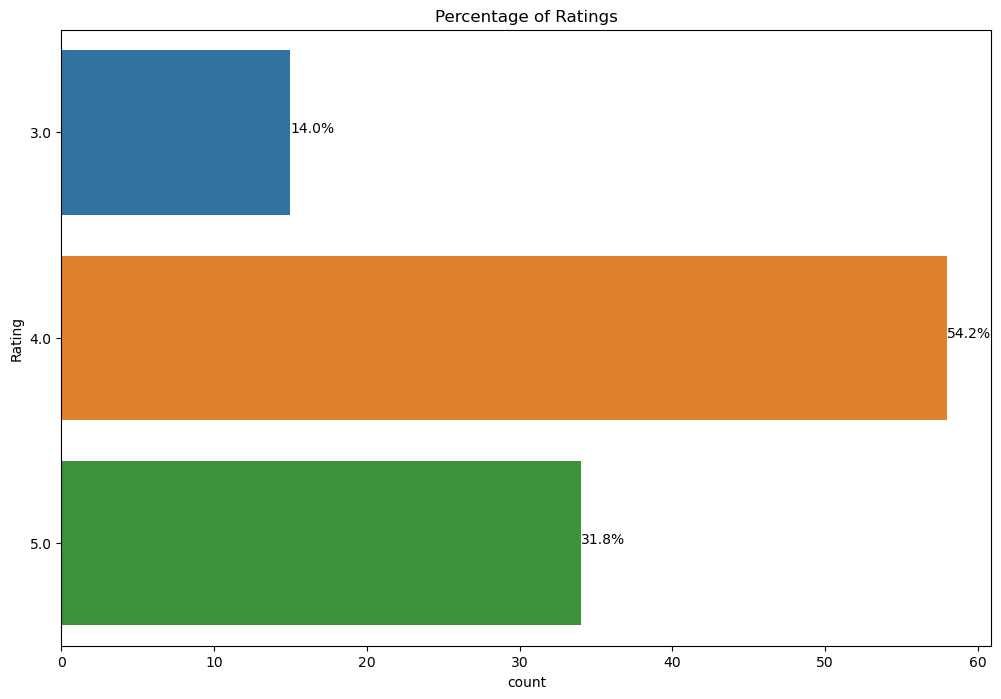

In [57]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### Spelling Correction

In [58]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Looks so good... Easy to use. Charging fast. C...
1    His smart (model Coat extend plus) watch is sa...
2    His smart watch is very nice and good quality ...
3    The media could not be loaded.\n              ...
4    Review OverviewAverage2.The Coat today launche...
Name: Review, dtype: object

In [59]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Looks so good... Easy to use. Charging fast. C...
1,This smart (model Boat extend plus) watch is f...
2,This smart watch is very nice and good quality...
3,The media could not be loaded.\n ...
4,Review OverviewAverage2.7The Boat today launch...
...,...
104,Ok Help required to connect to Alexa.Dial a b...
105,"Accuracy of all the readings sleep, walking, ..."
107,It is very nice watch working properly price r...
108,"Good product, value for money.."


### Resetting index

In [60]:
boat_review.reset_index(drop=True, inplace=True)

In [61]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

### Lemmatizer

In [62]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/107 [00:00<?, ?it/s]

In [63]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [64]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [65]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
6,daily activity excercise data recorded separat...,daily activities excercise data recorded separ...
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [66]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
6,daily activity excercise data recorded separat...,daily activities excercise data recorded separ...
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [67]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
6,daily activity excercise data recorded separat...,daily activities excercise data recorded separ...
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [68]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
6,daily activity excercise data recorded separat...,daily activities excercise data recorded separ...
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [69]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [70]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
6,daily activity excercise data recorded separat...,daily activities excercise data recorded separ...
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [71]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [72]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [73]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
6,daily activity excercise data recorded separat...,daily activities excercise data recorded separ...
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [74]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [75]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [look, good, easy, use, charging, fast, charge...
1    [smart, model, boat, extend, plus, watch, func...
2    [smart, watch, nice, good, quality, boat, comp...
3    [medium, could, loaded, used, watch, month, bo...
4    [review, overviewaverage, boat, today, launche...
5    [smart, watch, good, value, money, feature, pa...
6    [daily, activity, excercise, data, recorded, s...
7    [experience, boat, xtend, call, plus, smart, w...
8    [skipping, part, mostly, covered, review, spon...
9    [pro, premium, build, quality, matte, finishin...
Name: Clean_Reviews, dtype: object

In [76]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
2,smart watch nice good quality boat company,this smart watch nice good quality boat company,"[smart, watch, nice, good, quality, boat, comp..."
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
5,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa..."
6,daily activity excercise data recorded separat...,daily activities excercise data recorded separ...,"[daily, activity, excercise, data, recorded, s..."
7,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w..."
8,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."


In [77]:
stemmer = SnowballStemmer("english")

In [78]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,look good easi use charg fast charg stay long ...
1,smart model boat extend plus watch function we...
2,smart watch nice good qualiti boat compani
3,medium could load use watch month bought first...
4,review overviewaverag boat today launch boat x...
...,...
102,ok help requir connect alexa dial bit big
103,accuraci read sleep walk hear stress suspect c...
104,nice watch work proper price rang nice must bu...
105,good product valu money


In [79]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,look good easy use charging fast charge stay l...
1,smart model boat extend plus watch functioning...
2,smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...
4,review overviewaverage boat today launched boa...
...,...
102,ok help required connect alexa dial bit big
103,accuracy reading sleep walking hear stress sus...
104,nice watch working properly price range nice m...
105,good product value money


In [80]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [82]:
print(cv.get_feature_names_out()[109:200])


['better' 'beyond' 'bezel' 'big' 'bike' 'bip' 'bit' 'black' 'bloated'
 'blood' 'blue' 'bluetooth' 'boat' 'body' 'bother' 'bought' 'box'
 'boyfriend' 'bp' 'bpm' 'brand' 'break' 'breath' 'breathing' 'bright'
 'brightness' 'brings' 'browsing' 'brushed' 'bt' 'budget' 'bug' 'build'
 'buildi' 'built' 'bulb' 'burn' 'burnt' 'button' 'buy' 'buying' 'cable'
 'cache' 'calculated' 'calculating' 'calculation' 'calculator' 'calender'
 'call' 'called' 'caller' 'callin' 'calling' 'calorie' 'calory' 'cals'
 'came' 'camera' 'cannot' 'carddesign' 'care' 'cart' 'case' 'category'
 'catering' 'change' 'changed' 'charge' 'charger' 'charging' 'charm'
 'cheap' 'check' 'checked' 'checking' 'childish' 'chinese' 'choose'
 'claim' 'claimed' 'classic' 'clean' 'clear' 'clearing' 'clearly' 'click'
 'clipuser' 'clone' 'close' 'cloud' 'cm']


In [84]:
print(cv.get_feature_names_out()[:100])


['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accessibility' 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'ach' 'ackward' 'activate'
 'activating' 'active' 'activites' 'activity' 'actual' 'actually'
 'adapter' 'add' 'added' 'addition' 'adjust' 'advanced' 'advertised'
 'aggregate' 'ago' 'alarm' 'alert' 'alexa' 'allowed' 'allowing' 'almost'
 'along' 'also' 'alternative' 'aluminium' 'always' 'amaze' 'amazfit'
 'amazing' 'amazon' 'amoled' 'amount' 'analog' 'android' 'angle' 'animal'
 'animation' 'anniversary' 'another' 'answer' 'anything' 'anywhere' 'aod'
 'apart' 'app' 'appaccuracyaccuracy' 'appaccuracybatteryfinal'
 'appearance' 'appeared' 'apple' 'apps' 'appyou' 'around' 'arre' 'asakte'
 'aside' 'asks' 'aspect' 'assistant' 'assisted' 'atm' 'attached'
 'attaching' 'attention' 'attractive' 'audio' 'auto' 'available' 'average'
 'away' 'awesome' 'back' 'background' 'backup' 'bad' 'badge' 'band' 'bank'
 'ba

In [85]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [86]:
dataframe = dataframe.reset_index(drop=True)

In [87]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [88]:
corpus[3]

'medium could load use watch month bought first sale keep read unbias review tip trick ensur function watch work smoothli larg curv display price categori inch batteri heavi usag frequent wake screen alexa alarm notif day standbi check time occassion day pretti good full charg time hour decent qualiti magnet charg cabl provid use low power adapt power bank laptop necessari health workout track option spo oxymet heart rate monitor accuraci sleep track pretti accur paedomet accur time sometim hundr step ad randomli without activ happen randomli day stress monitor also sure calcul sensor fake probabl watch contact skin display warn messag display data lift wake gestur work second delay manag tap wake function work popular notif whatsapp sm facebook instagram etc read entir sm watch messag unless long call pick silenc see caller id reject call bt music control weather updat alexa usabl smart featur differ watch face avail boat wave app realli good also customis wallpap watch face see post 

### Applying Countvectorizer (Creating the Bag of Words model)

In [89]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [90]:
X.shape

(106, 1546)

In [92]:
feature_names = list(cv.vocabulary_.keys())
print(feature_names[:20])


['look', 'good', 'easi', 'use', 'charg', 'fast', 'long', 'time', 'look good', 'easi use', 'charg fast', 'look good easi', 'smart', 'model', 'boat', 'plu', 'watch', 'function', 'well', 'worth']


In [93]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [96]:
feature_names = cv.get_feature_names_out()
count_df = pd.DataFrame(X, columns=feature_names)


In [97]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [98]:
corpus[4]

'review overviewaverag boat today launch boat xtend compani latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembl appl watch moreov built amazon alexa support spo track stress track much come budget segment worth buy smartwatch queri noth worri detail review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfin wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharg clipus manual warranti carddesign build comfortwhen buy smartwatch one alway think design look apart featur design build anoth major aspect one take care buy smartwatch boat work design time bring premium side term look design inspir appl watch cannot compar obvious everi aspect appl watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build qualiti much premium one boat xtend design buildi person like color scheme boat xtend smartwat

### Applying TF-IDF Vectorizer

In [99]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [100]:
X.shape

(106, 1546)

In [102]:
feature_names = tfidf_v.get_feature_names_out()
print(feature_names[:20])


['accept' 'access' 'account' 'accur' 'accuraci' 'accuraci sleep'
 'accuraci sleep track' 'activ' 'activ includ' 'activ step' 'actual' 'ad'
 'add' 'ago' 'alarm' 'alarm set' 'alarm timer' 'alert' 'alexa'
 'alexa support']


In [103]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [108]:
feature_names = tfidf_v.get_feature_names_out()
count_df = pd.DataFrame(X, columns=feature_names)


In [109]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'look good easy use charging fast charge stay long time smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement also nearer instrument stress also reflecting nearly real condition activity step showing correct distance also good watch taking bike ride walking showing distance covered set target sport feature checked yet fully checked feature functional water resistant yes water resistant checked bathing drizzle rain time display good number display available cloud sufficient always feature working model available feature pleasing could skin made available display wrist put rest raise respectively feature functional feature a

### Parts Of Speech (POS) Tagging

In [110]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [111]:
for token in doc_block[:50]:
    print(token,token.pos_)

look VERB
good ADJ
easy ADJ
use NOUN
charging VERB
fast ADJ
charge NOUN
stay VERB
long ADJ
time NOUN
smart ADJ
model NOUN
boat NOUN
extend VERB
plus CCONJ
watch VERB
functioning VERB
well ADV
worth ADJ
price NOUN
r NOUN
battery NOUN
beginning NOUN
lasted VERB
day NOUN
next ADJ
charge NOUN
lasted VERB
day NOUN
last ADV
settled VERB
one NUM
day NOUN
extensive ADJ
user NOUN
apps NOUN
amoled VERB
display NOUN
good ADJ
touch NOUN
feature VERB
good ADJ
access NOUN
apps NOUN
easily ADV
reachable ADJ
simple ADJ
browsing VERB
feature NOUN
sleep NOUN


### Filtering the nouns and verbs only

In [112]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['call', 'listening', 'video', 'walking', 'battery', 'drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'read', 'message', 'calender', 'month', 'check', 'date', 'rest', 'month', 'boat', 'app', 'phone', 'issue', 'syncing', 'bought', 'watch', 'check', 'mom', 'night', 'time', 'course', 'manufacturer', 'claimed', 'measurement', 'blood', 'pressure', 'using', 'satisfaction', 'experience', 'watch', 'quality', 'boat', 'company', 'medium', 'loaded', 'watch', 'month', 'bought', 'sale', 'keep', 'reading', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'display', 'price', 'category', 'inch', 'battery', 'usage', 'waking', 'screen', 'alarm', 'notification', 'day', 'checking', 'time', 

### Counting the noun & verb tokens

In [113]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,191
1,boat,95
2,feature,81
3,time,71
4,day,55
5,smartwatch,54
6,display,50
7,app,47
8,xtend,45
9,call,44


### Visualizing results (Barchart for top 10 nouns + verbs)

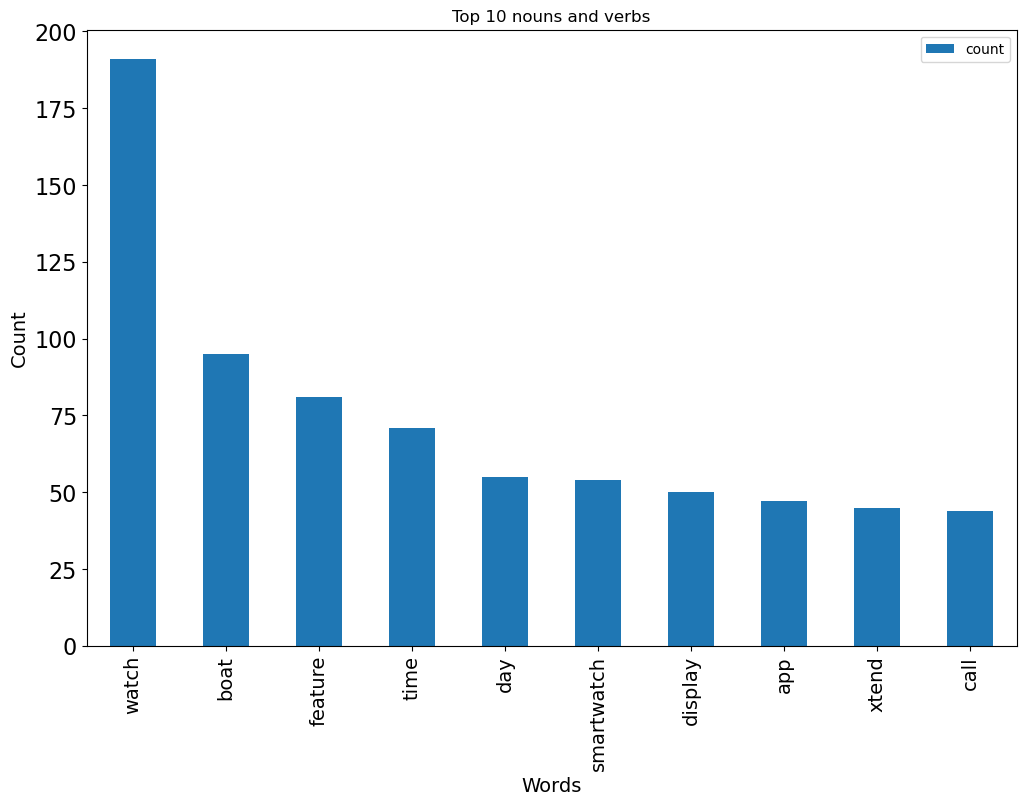

In [114]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [115]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [116]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [117]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [118]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,102
neg,4


###  Let's calculate subjectivity and Polarity

In [119]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge...",0.608333,0.320833
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
2,smart watch nice good quality boat company,this smart watch nice good quality boat company,"[smart, watch, nice, good, quality, boat, comp...",0.747619,0.504762
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171


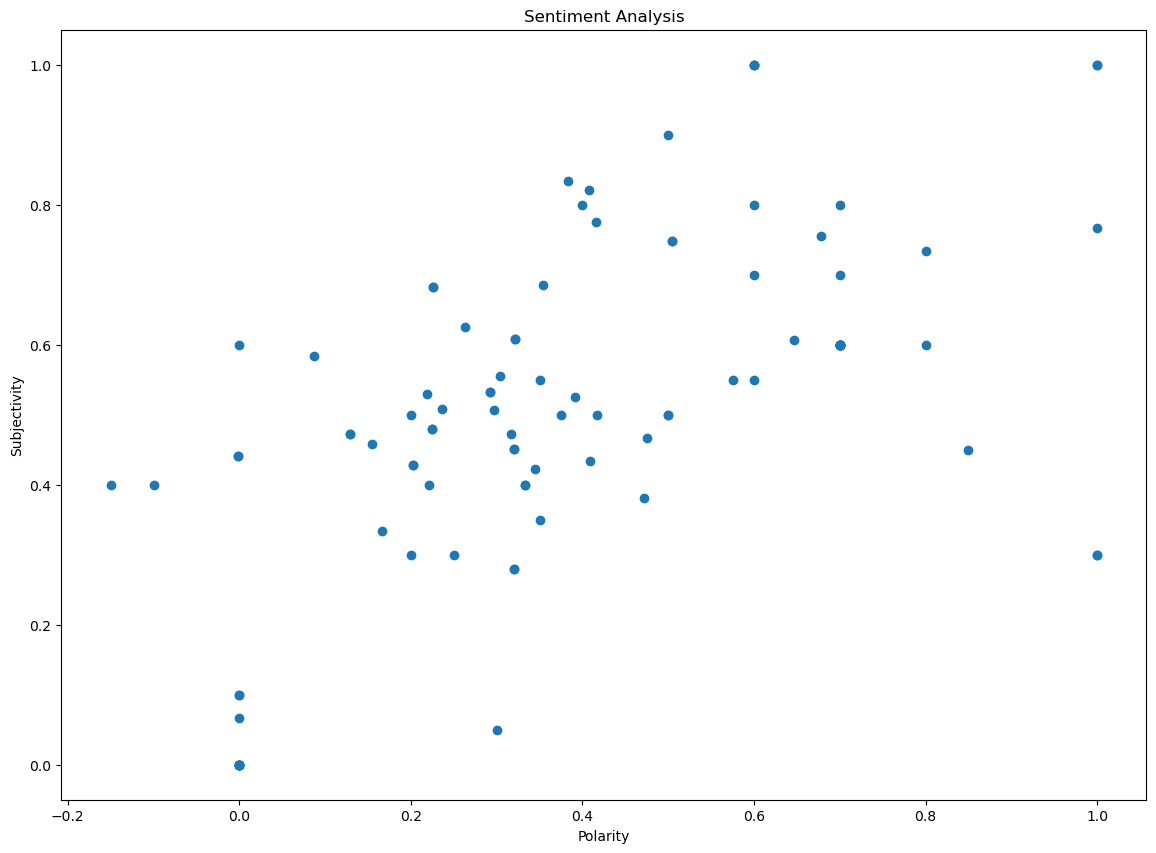

In [120]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [121]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge...",0.608333,0.320833,pos
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
2,smart watch nice good quality boat company,this smart watch nice good quality boat company,"[smart, watch, nice, good, quality, boat, comp...",0.747619,0.504762,pos
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171,pos


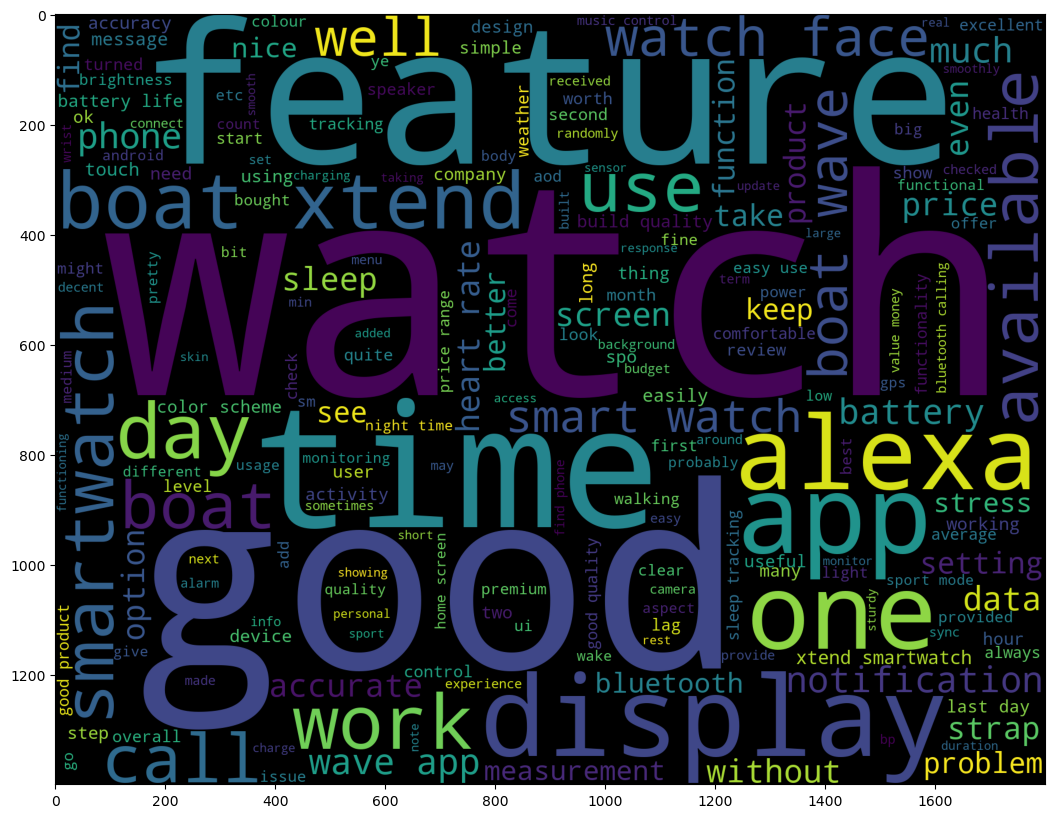

In [122]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

In [123]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

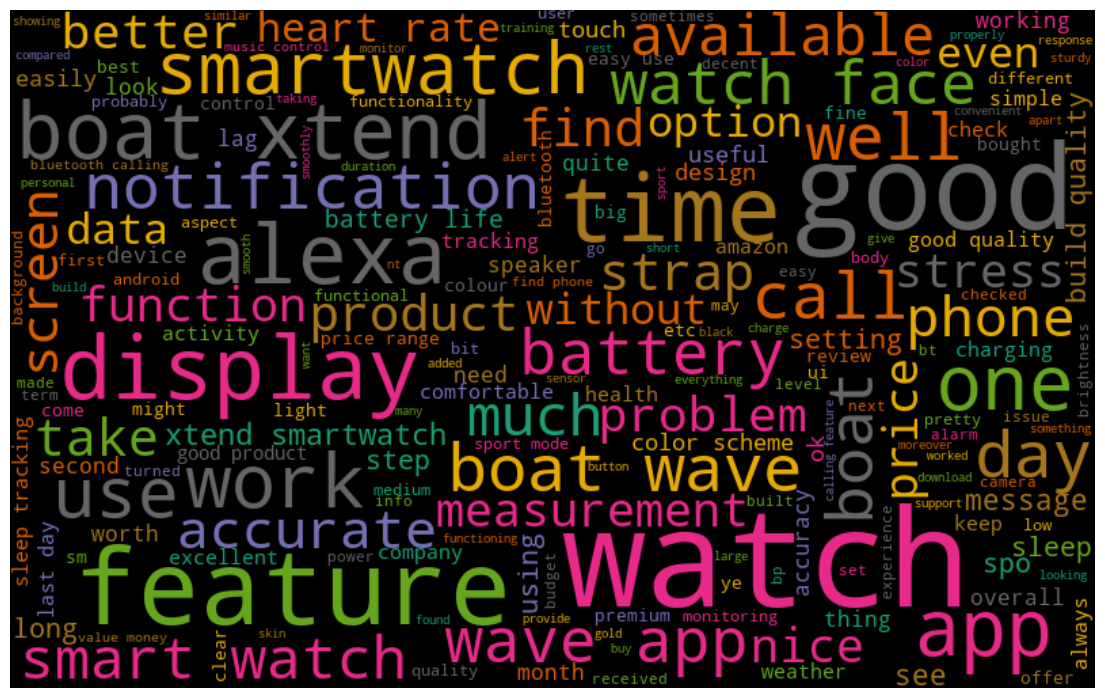

In [124]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

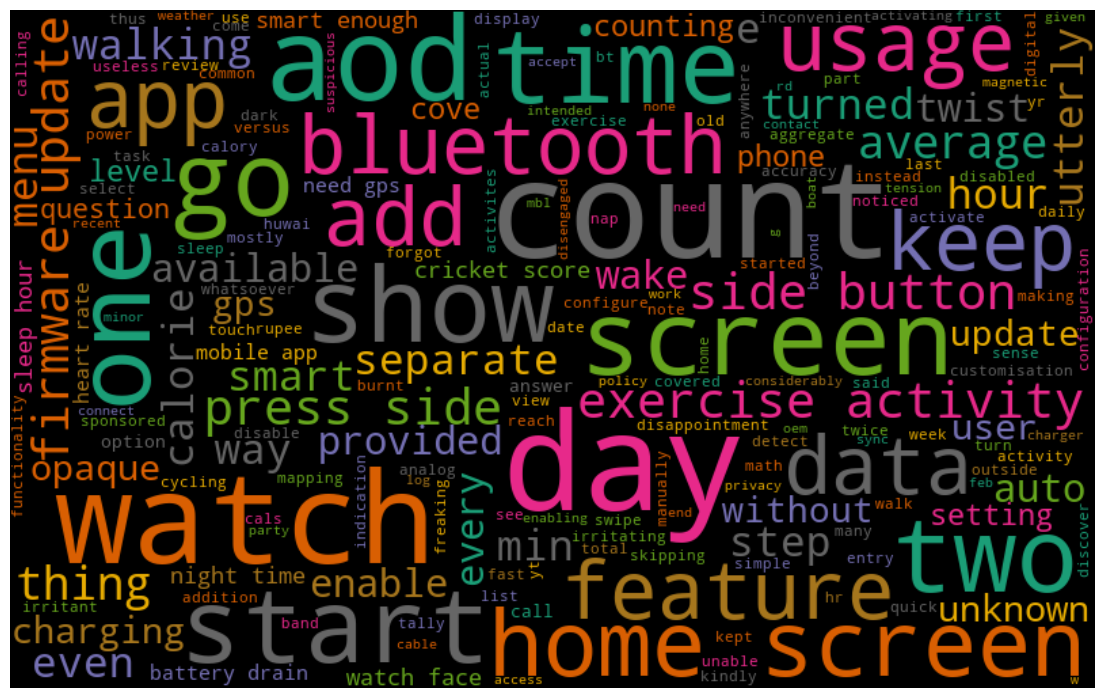

In [125]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)